In [1]:
import csv
import build_influence_network as bn
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import networkx as nx
import numpy as np
import pathlib
import infomap

In [2]:
# As a csv.reader is an expendible resource we write the lines of our csv file to a list
with open("influence_data.csv", "rt") as infile:
        reader = csv.reader(infile)
        # We discard the column labels as they are unneccesary 
        next(reader)
        inf_data = list(reader)

In [3]:
# As a csv.reader is an expendible resource we write the lines of our csv file to a list
with open("data_by_artist.csv", "rt") as infile:
        reader = csv.reader(infile)
        # We discard the column labels as they are unneccesary 
        next(reader)
        artist_data = list(reader)

In [4]:
graph = bn.build_graph(inf_data, artist_data)

Our graph is an acyclic directed graph: False
Our artistic influence network has 5603 artists.
Our artistic influence network has 42770 edges out of a possible 31388006 possible edges.
Our network density is: 0.0013626223978675167
Our graph is strongly connected: False
The number of strongly connected components is: 4747
The average clustering coefficient is: 0.09128001728442253


In [5]:
spring_pos = nx.spring_layout(graph)

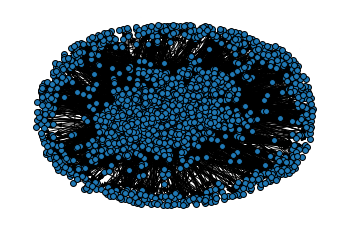

In [6]:
plt.axis("off")
nx.draw_networkx(graph, pos = spring_pos,  with_labels = False, node_size = 35)
# We need the following two lines to draw boundaries around our nodes
# Taken from https://stackoverflow.com/questions/44874397/node-has-no-boundary-in-python-networkx
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")
plt.show()

In [11]:
def findCommunities(G):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id and return number of communities found.
    """
  
    im = infomap.Infomap("--directed")
    
    print("Building network...")
    for e in G.edges():
        im.add_node(int(e[0]))
        im.add_node(int(e[1]))
        im.add_link(int(e[0]),int(e[1]))

    # Cluster network
    im.run();
    print(f"Found {im.num_top_modules} modules with codelength: {im.codelength}")
    
    print("\n#node_id module_id")
    for node, module in im.modules:
        print(f"{node} {module}")

    print("\n#node_id module_id path depth child_index flow [name]:")
    for node in im.nodes:
        print(node.node_id, node.module_id, node.path,
          node.depth, node.child_index, node.flow, im.get_name(node.node_id, default=""))
    # Add the community number to each node as an attribute
    for node1 in G.nodes():
            for node2 in im.nodes:
                if int(node1) == int(node2.node_id):
                    G.nodes[node1]["community"] = node2.module_id 

    print("\nDone!")
    
    return G
    
graph_community_id = findCommunities(graph)



Building network...
Found 116 modules with codelength: 7.934391210187035

#node_id module_id
74 1
335 1
441 9
589 46
1097 48
1098 9
1113 23
1163 28
1190 15
1266 11
1433 22
1498 9
1589 35
1611 24
2130 35
2252 42
2273 76
2330 33
2411 11
2578 32
2750 15
2867 42
3056 11
3170 21
3226 1
3413 26
3426 7
3595 60
3627 19
3669 72
3829 2
4358 19
4451 1
4458 11
4553 20
4852 23
4955 4
5307 15
5366 64
5441 9
5501 9
5882 1
5953 9
5980 27
6143 13
6232 52
6310 1
6320 34
6334 26
6563 31
6568 15
6613 66
6855 24
6860 48
7031 46
7230 42
7305 45
7448 7
7689 15
7729 1
7731 9
7920 9
7974 21
8125 7
8245 38
8549 1
8570 1
8591 1
8828 23
9084 11
9218 7
9437 22
9441 9
9490 1
9680 8
9787 9
9970 9
10412 34
10538 11
10982 1
11028 60
11046 32
11052 21
11210 15
11242 5
11506 1
11608 42
11620 42
11664 9
11707 34
11754 23
11910 13
11970 23
12128 7
12180 21
12472 3
12491 15
12570 19
12595 1
12644 13
12654 9
12802 49
12877 36
12972 1
13038 67
13101 56
13377 8
13384 22
13387 32
13393 7
13508 1
13511 6
13583 37
13755 9
14073 

345168 13
345227 7
345355 32
345426 13
345427 8
345708 33
345734 14
346336 4
346637 16
346684 1
346806 1
347148 9
347151 32
347451 32
347639 42
347741 22
348884 5
349157 9
349180 1
350139 1
350585 21
350840 21
350892 31
351227 34
351733 11
351842 7
352164 45
352171 19
352294 33
352524 3
352575 7
352770 9
352999 22
353145 5
354105 3
354158 1
354189 1
354609 11
354631 51
354722 23
354733 62
354883 32
355052 33
355142 8
355208 1
355412 1
355451 5
355555 11
355616 9
355998 7
356422 60
357057 16
357406 1
358055 15
358528 37
358532 67
358641 9
358820 11
359016 8
359026 48
359062 11
359123 65
359179 32
359199 28
359326 9
359494 19
359555 56
359559 15
359613 59
359966 32
360948 40
360956 13
361393 7
361541 11
361973 13
362437 22
362922 62
363100 9
363307 104
363327 11
364399 1
364861 18
365542 1
365821 11
366164 7
366407 14
366681 1
366889 14
367156 11
367188 23
367231 32
367272 80
367417 15
367459 1
368112 22
368367 14
368451 41
368578 23
369183 1
369270 17
369389 41
369955 8
370326 32
370703

924318 111
924508 1
924780 1
925066 7
925181 3
925450 4
925528 1
925635 15
925636 9
925837 9
925852 9
926021 15
926085 9
926108 21
926115 65
926237 1
926307 1
926428 11
926548 1
926604 11
927278 7
927373 1
927555 15
927627 3
927650 23
927736 8
927795 22
928160 52
928351 9
928942 2
929659 1
929673 1
929776 11
930204 11
930642 7
930651 11
930722 4
931015 36
931086 33
931105 1
931231 108
931567 25
931869 35
932299 24
932328 1
932665 32
932858 33
932922 67
933172 17
933458 7
933568 42
933621 32
933633 38
933809 77
933883 8
933898 15
933927 4
934069 22
934243 1
934305 20
934350 13
934367 9
934721 8
934801 1
935117 15
935330 15
935413 38
935739 7
935990 103
936009 15
936095 36
936126 14
936190 8
936206 21
936425 4
936521 56
936658 27
936946 8
937003 1
937098 1
937150 11
937242 33
937397 95
937703 102
938337 11
938487 19
938638 1
938798 1
938878 4
939033 22
939187 19
939565 21
939567 8
939871 49
940246 19
940583 1
940831 4
941579 5
942252 24
942335 11
942529 3
942624 51
943268 9
943649 11
943

591048 1 (1, 261) 2 260 7.135485256468531e-05 
759031 1 (1, 262) 2 261 7.099619742556836e-05 
636394 1 (1, 263) 2 262 7.084983964680057e-05 
897322 1 (1, 264) 2 263 7.078816396110991e-05 
480830 1 (1, 265) 2 264 6.999957556948876e-05 
341672 1 (1, 266) 2 265 6.990873344584202e-05 
860080 1 (1, 267) 2 266 6.926978883660925e-05 
482677 1 (1, 268) 2 267 6.88930113721495e-05 
496487 1 (1, 269) 2 268 6.831452543268493e-05 
312354 1 (1, 270) 2 269 6.814764259674004e-05 
567570 1 (1, 271) 2 270 6.806174540345184e-05 
740833 1 (1, 272) 2 271 6.692748614584528e-05 
305363 1 (1, 273) 2 272 6.674765651631392e-05 
604075 1 (1, 274) 2 273 6.647740889654734e-05 
222351 1 (1, 275) 2 274 6.636631317150382e-05 
563834 1 (1, 276) 2 275 6.633747024814828e-05 
120615 1 (1, 277) 2 276 6.583342309223229e-05 
921710 1 (1, 278) 2 277 6.579878696753811e-05 
39258 1 (1, 279) 2 278 6.558362562742084e-05 
58386 1 (1, 280) 2 279 6.551327978309385e-05 
108679 1 (1, 281) 2 280 6.534299818959906e-05 
520033 1 (1, 282

546976 1 (1, 623) 2 622 0.0 
543169 1 (1, 624) 2 623 0.0 
536321 1 (1, 625) 2 624 0.0 
507955 1 (1, 626) 2 625 0.0 
760658 1 (1, 627) 2 626 0.0 
501860 1 (1, 628) 2 627 0.0 
498484 1 (1, 629) 2 628 0.0 
762496 1 (1, 630) 2 629 0.0 
498241 1 (1, 631) 2 630 0.0 
494038 1 (1, 632) 2 631 0.0 
74 1 (1, 633) 2 632 0.0 
489435 1 (1, 634) 2 633 0.0 
763747 1 (1, 635) 2 634 0.0 
486395 1 (1, 636) 2 635 0.0 
484890 1 (1, 637) 2 636 0.0 
766354 1 (1, 638) 2 637 0.0 
483563 1 (1, 639) 2 638 0.0 
480984 1 (1, 640) 2 639 0.0 
766444 1 (1, 641) 2 640 0.0 
480549 1 (1, 642) 2 641 0.0 
476558 1 (1, 643) 2 642 0.0 
768585 1 (1, 644) 2 643 0.0 
768737 1 (1, 645) 2 644 0.0 
771388 1 (1, 646) 2 645 0.0 
476248 1 (1, 647) 2 646 0.0 
475010 1 (1, 648) 2 647 0.0 
474150 1 (1, 649) 2 648 0.0 
473909 1 (1, 650) 2 649 0.0 
461698 1 (1, 651) 2 650 0.0 
775694 1 (1, 652) 2 651 0.0 
459860 1 (1, 653) 2 652 0.0 
453009 1 (1, 654) 2 653 0.0 
778526 1 (1, 655) 2 654 0.0 
778925 1 (1, 656) 2 655 0.0 
451398 1 (1, 657) 

239961 4 (4, 13) 2 12 0.0014401111218466372 
803720 4 (4, 14) 2 13 0.0014355902978092526 
38490 4 (4, 15) 2 14 0.0013475925089897823 
174557 4 (4, 16) 2 15 0.0011393080831059912 
404463 4 (4, 17) 2 16 0.0010627877224566437 
418981 4 (4, 18) 2 17 0.0010366299449956335 
477875 4 (4, 19) 2 18 0.0009747873392091658 
87985 4 (4, 20) 2 19 0.0009200339157702663 
796734 4 (4, 21) 2 20 0.0009103013107161959 
582313 4 (4, 22) 2 21 0.0008729662845510343 
90803 4 (4, 23) 2 22 0.0008708999070841206 
664194 4 (4, 24) 2 23 0.000845892651768726 
171637 4 (4, 25) 2 24 0.0008022633964433976 
279141 4 (4, 26) 2 25 0.0007603927153388192 
241813 4 (4, 27) 2 26 0.0007347505892296503 
240311 4 (4, 28) 2 27 0.0007270760826628738 
376608 4 (4, 29) 2 28 0.0006437651050130844 
43714 4 (4, 30) 2 29 0.0006034942237593425 
483587 4 (4, 31) 2 30 0.0006011987834308095 
182900 4 (4, 32) 2 31 0.0005687849896733586 
117001 4 (4, 33) 2 32 0.0005555998351858848 
159214 4 (4, 34) 2 33 0.0004694382572930668 
232564 4 (4, 35

168958 7 (7, 68) 2 67 0.00016023063879658662 
29067 7 (7, 69) 2 68 0.00014804738576378292 
517074 7 (7, 70) 2 69 0.00014486514189934188 
798792 7 (7, 71) 2 70 0.00014408551393814748 
243474 7 (7, 72) 2 71 0.00014260795281041946 
312890 7 (7, 73) 2 72 0.00014226163051873236 
607773 7 (7, 74) 2 73 0.00014065974817020814 
805208 7 (7, 75) 2 74 0.00013950490176791716 
159791 7 (7, 76) 2 75 0.00013398786945834805 
477377 7 (7, 77) 2 76 0.00013251430204526746 
242473 7 (7, 78) 2 77 0.00013246398244853605 
366164 7 (7, 79) 2 78 0.0001269762522290982 
52736 7 (7, 80) 2 79 0.00012520445770160184 
7448 7 (7, 81) 2 80 0.00012425163391319724 
127063 7 (7, 82) 2 81 0.00012218371880521 
59655 7 (7, 83) 2 82 0.00012068014342663537 
752773 7 (7, 84) 2 83 0.00011560090014852122 
578744 7 (7, 85) 2 84 0.00010966120262444421 
762731 7 (7, 86) 2 85 0.00010941141779231912 
567624 7 (7, 87) 2 86 0.00010823957497689053 
280445 7 (7, 88) 2 87 0.00010807836211089906 
774956 7 (7, 89) 2 88 0.0001070365413711548

194036 8 (8, 89) 2 88 0.0001039094543995331 
451296 8 (8, 90) 2 89 0.00010334810015242607 
855405 8 (8, 91) 2 90 9.76589014586769e-05 
554963 8 (8, 92) 2 91 9.256084956483253e-05 
590265 8 (8, 93) 2 92 9.209015015944936e-05 
746068 8 (8, 94) 2 93 8.893443877804672e-05 
936946 8 (8, 95) 2 94 8.293679164843145e-05 
814852 8 (8, 96) 2 95 8.094068456537209e-05 
194743 8 (8, 97) 2 96 8.068117261915279e-05 
764890 8 (8, 98) 2 97 7.527789193819304e-05 
153590 8 (8, 99) 2 98 7.439205672127384e-05 
248798 8 (8, 100) 2 99 7.403043288609571e-05 
848034 8 (8, 101) 2 100 7.382031797310085e-05 
398259 8 (8, 102) 2 101 7.326376817675928e-05 
811622 8 (8, 103) 2 102 7.277053590004959e-05 
927736 8 (8, 104) 2 103 6.945818813103053e-05 
166785 8 (8, 105) 2 104 6.793112670685713e-05 
805332 8 (8, 106) 2 105 6.70926741984473e-05 
83859 8 (8, 107) 2 106 6.440856153134793e-05 
463435 8 (8, 108) 2 107 6.285072109066691e-05 
89018 8 (8, 109) 2 108 6.209598627387542e-05 
394449 8 (8, 110) 2 109 5.8766246466182

29808 9 (9, 124) 2 123 8.14592375168147e-05 
820115 9 (9, 125) 2 124 8.144072905193686e-05 
12654 9 (9, 126) 2 125 7.956932233018577e-05 
639056 9 (9, 127) 2 126 7.896591204743562e-05 
948171 9 (9, 128) 2 127 7.756924158872478e-05 
925837 9 (9, 129) 2 128 7.352654189452879e-05 
251604 9 (9, 130) 2 129 7.293074922191736e-05 
561715 9 (9, 131) 2 130 7.198994229348406e-05 
671244 9 (9, 132) 2 131 6.83894492142184e-05 
928351 9 (9, 133) 2 132 6.683299996754623e-05 
303626 9 (9, 134) 2 133 6.439626529979652e-05 
219966 9 (9, 135) 2 134 6.322817710806701e-05 
677842 9 (9, 136) 2 135 6.30506235828804e-05 
770007 9 (9, 137) 2 136 6.273217084933644e-05 
186096 9 (9, 138) 2 137 6.238358003664545e-05 
50251 9 (9, 139) 2 138 6.222907403892232e-05 
772745 9 (9, 140) 2 139 6.0723131283509754e-05 
689367 9 (9, 141) 2 140 5.973608571951749e-05 
305468 9 (9, 142) 2 141 5.826401252598308e-05 
165162 9 (9, 143) 2 142 5.722585889343681e-05 
31324 9 (9, 144) 2 143 5.6386974615372495e-05 
223627 9 (9, 145) 

3408531 9 (9, 504) 2 503 0.0 
9787 9 (9, 505) 2 504 0.0 
3523590 9 (9, 506) 2 505 0.0 
3661296 9 (9, 507) 2 506 0.0 
403120 10 (10, 1) 2 0 0.010078553485553256 
898336 10 (10, 2) 2 1 0.008862029067741996 
82831 10 (10, 3) 2 2 0.004339454929529869 
821571 10 (10, 4) 2 3 0.002707911646927886 
894335 10 (10, 5) 2 4 0.0025283378239346773 
118544 10 (10, 6) 2 5 0.001896788646432356 
75171 10 (10, 7) 2 6 0.0015388449728361818 
479582 10 (10, 8) 2 7 0.0012089153382584914 
75825 10 (10, 9) 2 8 0.0011813889418759533 
82013 10 (10, 10) 2 9 0.0011104695012117457 
147200 10 (10, 11) 2 10 0.0010337678745991107 
55304 10 (10, 12) 2 11 0.0010293293358968189 
490763 10 (10, 13) 2 12 0.0008570158762928728 
35021 10 (10, 14) 2 13 0.0006471246653855947 
636044 10 (10, 15) 2 14 0.0005452490282282868 
265456 10 (10, 16) 2 15 0.0005382457295073763 
162820 10 (10, 17) 2 16 0.0005345849908477473 
80657 10 (10, 18) 2 17 0.00045073897194828515 
816895 10 (10, 19) 2 18 0.0003708162419246223 
200882 10 (10, 20) 2

643682 11 (11, 334) 2 333 0.0 
2312742 11 (11, 335) 2 334 0.0 
647246 11 (11, 336) 2 335 0.0 
2424501 11 (11, 337) 2 336 0.0 
2437431 11 (11, 338) 2 337 0.0 
657062 11 (11, 339) 2 338 0.0 
2532578 11 (11, 340) 2 339 0.0 
2640328 11 (11, 341) 2 340 0.0 
2729330 11 (11, 342) 2 341 0.0 
2754189 11 (11, 343) 2 342 0.0 
2802487 11 (11, 344) 2 343 0.0 
2986022 11 (11, 345) 2 344 0.0 
4458 11 (11, 346) 2 345 0.0 
3068662 11 (11, 347) 2 346 0.0 
3216219 11 (11, 348) 2 347 0.0 
3316228 11 (11, 349) 2 348 0.0 
3413218 11 (11, 350) 2 349 0.0 
894465 12 (12, 1) 2 0 0.0064519883608288075 
180228 12 (12, 2) 2 1 0.005502156722815044 
486305 12 (12, 3) 2 2 0.0019993031728695694 
309328 12 (12, 4) 2 3 0.0019367035523941956 
762288 12 (12, 5) 2 4 0.0013078268647772522 
303050 12 (12, 6) 2 5 0.0012182636789684436 
31067 12 (12, 7) 2 6 0.0010806104804824308 
81194 12 (12, 8) 2 7 0.0009077255423930734 
813392 12 (12, 9) 2 8 0.0007729682407811815 
987491 12 (12, 10) 2 9 0.0007516932993388116 
2993710 12 (12

210991 15 (15, 39) 2 38 0.00011107049371021001 
746666 15 (15, 40) 2 39 0.00011104845243576626 
17929 15 (15, 41) 2 40 0.0001101119266807156 
164053 15 (15, 42) 2 41 0.00010812880473316962 
332257 15 (15, 43) 2 42 0.00010616051109663921 
179764 15 (15, 44) 2 43 0.00010065631676973889 
761179 15 (15, 45) 2 44 9.401909626200891e-05 
161920 15 (15, 46) 2 45 9.332409642199134e-05 
664849 15 (15, 47) 2 46 9.231179025684056e-05 
696015 15 (15, 48) 2 47 8.788107516507281e-05 
498987 15 (15, 49) 2 48 8.056333270032671e-05 
834673 15 (15, 50) 2 49 7.919204046354745e-05 
788937 15 (15, 51) 2 50 7.851539133664479e-05 
490738 15 (15, 52) 2 51 7.675588808431338e-05 
314505 15 (15, 53) 2 52 7.250540567862418e-05 
755570 15 (15, 54) 2 53 7.160883710868022e-05 
127696 15 (15, 55) 2 54 6.900718739919867e-05 
1190 15 (15, 56) 2 55 6.268987639429314e-05 
86826 15 (15, 57) 2 56 6.213699154927655e-05 
573978 15 (15, 58) 2 57 5.908864231918309e-05 
572106 15 (15, 59) 2 58 5.67952070146149e-05 
103162 15 (15

130418 19 (19, 126) 2 125 0.0 
759454 19 (19, 127) 2 126 0.0 
177372 19 (19, 128) 2 127 0.0 
116465 19 (19, 129) 2 128 0.0 
571472 19 (19, 130) 2 129 0.0 
170758 19 (19, 131) 2 130 0.0 
476599 19 (19, 132) 2 131 0.0 
695943 19 (19, 133) 2 132 0.0 
223683 19 (19, 134) 2 133 0.0 
225944 19 (19, 135) 2 134 0.0 
803115 19 (19, 136) 2 135 0.0 
413853 19 (19, 137) 2 136 0.0 
518937 19 (19, 138) 2 137 0.0 
70704 19 (19, 139) 2 138 0.0 
233300 19 (19, 140) 2 139 0.0 
382671 19 (19, 141) 2 140 0.0 
837526 19 (19, 142) 2 141 0.0 
31971 19 (19, 143) 2 142 0.0 
177957 19 (19, 144) 2 143 0.0 
885387 19 (19, 145) 2 144 0.0 
279395 19 (19, 146) 2 145 0.0 
254083 19 (19, 147) 2 146 0.0 
302955 19 (19, 148) 2 147 0.0 
642354 19 (19, 149) 2 148 0.0 
24309 19 (19, 150) 2 149 0.0 
921888 19 (19, 151) 2 150 0.0 
683921 19 (19, 152) 2 151 0.0 
938487 19 (19, 153) 2 152 0.0 
12570 19 (19, 154) 2 153 0.0 
940246 19 (19, 155) 2 154 0.0 
483473 19 (19, 156) 2 155 0.0 
258947 19 (19, 157) 2 156 0.0 
986695 19 (1

189701 22 (22, 23) 2 22 0.00011726296637899246 
162269 22 (22, 24) 2 23 0.00011660961886942815 
368112 22 (22, 25) 2 24 0.00010952356966370912 
286115 22 (22, 26) 2 25 0.00010433579967705818 
788569 22 (22, 27) 2 26 0.00010273082365370314 
837215 22 (22, 28) 2 27 9.395448112923627e-05 
285272 22 (22, 29) 2 28 9.103099350753208e-05 
99753 22 (22, 30) 2 29 8.982920227726338e-05 
686560 22 (22, 31) 2 30 8.981856802156773e-05 
749476 22 (22, 32) 2 31 8.790543780998569e-05 
362437 22 (22, 33) 2 32 8.70708294349308e-05 
868456 22 (22, 34) 2 33 8.648370954738433e-05 
749175 22 (22, 35) 2 34 8.268355476038956e-05 
820999 22 (22, 36) 2 35 8.194358530511447e-05 
1433 22 (22, 37) 2 36 7.524481178856484e-05 
232701 22 (22, 38) 2 37 7.46560872663059e-05 
307875 22 (22, 39) 2 38 7.099348131371583e-05 
142050 22 (22, 40) 2 39 6.833117384285407e-05 
858375 22 (22, 41) 2 40 6.537616960932643e-05 
22257 22 (22, 42) 2 41 6.407847885065357e-05 
195237 22 (22, 43) 2 42 6.213037417759889e-05 
837946 22 (22,

315909 30 (30, 1) 2 0 0.0016890354204004419 
783025 30 (30, 2) 2 1 0.001441869645084356 
793227 30 (30, 3) 2 2 0.0010991977660127074 
81796 31 (31, 1) 2 0 0.0015085488298639876 
396372 31 (31, 2) 2 1 0.001497646701610792 
179379 31 (31, 3) 2 2 0.00029024274801054783 
290464 31 (31, 4) 2 3 0.0001264257037317035 
845443 31 (31, 5) 2 4 0.00012193050468997587 
655273 31 (31, 6) 2 5 6.107470940744416e-05 
133119 31 (31, 7) 2 6 5.824290606339047e-05 
791318 31 (31, 8) 2 7 5.5416188231838644e-05 
943936 31 (31, 9) 2 8 5.12547686901765e-05 
776301 31 (31, 10) 2 9 4.968198107694509e-05 
19435 31 (31, 11) 2 10 4.414552646411455e-05 
767741 31 (31, 12) 2 11 3.7954164345428016e-05 
803162 31 (31, 13) 2 12 2.4792410110342417e-05 
188202 31 (31, 14) 2 13 1.8697438079503382e-05 
18137 31 (31, 15) 2 14 1.7869274708032897e-05 
319945 31 (31, 16) 2 15 1.5009631890556464e-05 
104388 31 (31, 17) 2 16 1.4571424345566042e-05 
6563 31 (31, 18) 2 17 9.122360712777839e-06 
773407 31 (31, 19) 2 18 8.74117634415

951375 37 (37, 32) 2 31 6.580468483626037e-06 
414291 37 (37, 33) 2 32 6.189538924815572e-06 
756959 37 (37, 34) 2 33 6.189538924815572e-06 
600069 37 (37, 35) 2 34 6.189538924815572e-06 
124825 37 (37, 36) 2 35 6.1895389248155715e-06 
812239 37 (37, 37) 2 36 6.1895389248155715e-06 
636841 37 (37, 38) 2 37 0.0 
701790 37 (37, 39) 2 38 0.0 
616664 37 (37, 40) 2 39 0.0 
748933 37 (37, 41) 2 40 0.0 
566448 37 (37, 42) 2 41 0.0 
562105 37 (37, 43) 2 42 0.0 
389378 37 (37, 44) 2 43 0.0 
358528 37 (37, 45) 2 44 0.0 
314576 37 (37, 46) 2 45 0.0 
245534 37 (37, 47) 2 46 0.0 
179105 37 (37, 48) 2 47 0.0 
97065 37 (37, 49) 2 48 0.0 
89873 37 (37, 50) 2 49 0.0 
73444 37 (37, 51) 2 50 0.0 
57577 37 (37, 52) 2 51 0.0 
36312 37 (37, 53) 2 52 0.0 
32409 37 (37, 54) 2 53 0.0 
13583 37 (37, 55) 2 54 0.0 
956675 37 (37, 56) 2 55 0.0 
1456229 37 (37, 57) 2 56 0.0 
2003453 37 (37, 58) 2 57 0.0 
3171799 37 (37, 59) 2 58 0.0 
3539434 37 (37, 60) 2 59 0.0 
575051 38 (38, 1) 2 0 0.00025648899963657233 
478603

178135 49 (49, 11) 2 10 3.270302355184903e-05 
764636 49 (49, 12) 2 11 2.966155464027447e-05 
690718 49 (49, 13) 2 12 2.475815569926229e-05 
338179 49 (49, 14) 2 13 2.108211519276151e-05 
741380 49 (49, 15) 2 14 1.8568616774446717e-05 
987922 49 (49, 16) 2 15 1.5127648678445976e-05 
26952 49 (49, 17) 2 16 1.4292208061213193e-05 
127889 49 (49, 18) 2 17 1.3255929196606251e-05 
35697 49 (49, 19) 2 18 8.770103564325414e-06 
201667 49 (49, 20) 2 19 8.10266913639762e-06 
230963 49 (49, 21) 2 20 6.1895389248155715e-06 
108265 49 (49, 22) 2 21 6.1895389248155715e-06 
776576 49 (49, 23) 2 22 6.1895389248155715e-06 
515750 49 (49, 24) 2 23 0.0 
227708 49 (49, 25) 2 24 0.0 
111969 49 (49, 26) 2 25 0.0 
622277 49 (49, 27) 2 26 0.0 
626115 49 (49, 28) 2 27 0.0 
675728 49 (49, 29) 2 28 0.0 
100197 49 (49, 30) 2 29 0.0 
32333 49 (49, 31) 2 30 0.0 
803533 49 (49, 32) 2 31 0.0 
814530 49 (49, 33) 2 32 0.0 
838884 49 (49, 34) 2 33 0.0 
860985 49 (49, 35) 2 34 0.0 
939871 49 (49, 36) 2 35 0.0 
14329 49 

603621 66 (66, 5) 2 4 1.698690685604181e-05 
757070 66 (66, 6) 2 5 6.189538924815573e-06 
98278 66 (66, 7) 2 6 6.189538924815572e-06 
276626 66 (66, 8) 2 7 6.1895389248155715e-06 
234192 66 (66, 9) 2 8 0.0 
399249 66 (66, 10) 2 9 0.0 
569064 66 (66, 11) 2 10 0.0 
808304 66 (66, 12) 2 11 0.0 
818627 66 (66, 13) 2 12 0.0 
837328 66 (66, 14) 2 13 0.0 
952503 66 (66, 15) 2 14 0.0 
71970 67 (67, 1) 2 0 0.00013499400589821187 
128290 67 (67, 2) 2 1 4.388948285297736e-05 
628684 67 (67, 3) 2 2 2.1535333913226215e-05 
358532 67 (67, 4) 2 3 1.756739943235508e-05 
49367 67 (67, 5) 2 4 1.3787157373593697e-05 
803242 67 (67, 6) 2 5 1.2655978274991705e-05 
667622 67 (67, 7) 2 6 7.597618448778124e-06 
1913210 67 (67, 8) 2 7 7.597618448778124e-06 
104314 67 (67, 9) 2 8 6.1895389248155715e-06 
147294 67 (67, 10) 2 9 6.1895389248155715e-06 
185155 67 (67, 11) 2 10 6.1895389248155715e-06 
13038 67 (67, 12) 2 11 0.0 
53916 67 (67, 13) 2 12 0.0 
191983 67 (67, 14) 2 13 0.0 
338287 67 (67, 15) 2 14 0.0 
38


Done!


TypeError: list indices must be integers or slices, not str

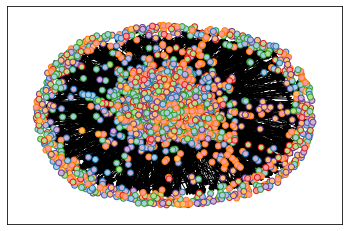

In [16]:
def drawNetwork(G):
    # position map
    pos = nx.spring_layout(G)
    # community ids
    communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
    numCommunities = max(communities) + 1
    # color map from http://colorbrewer2.org/
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw nodes
    nodeCollection = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = communities,
        node_size = 35,
        cmap = cmapLight
    )
    # Set node border color to the darker shade
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)

    # Draw node labels
    for n in G.nodes():
        plt.annotate(n,
            xy = pos[n],
            textcoords = 'offset points',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            xytext = [0, 0],
            color = cmapDark(communities[n])
        )

    # We need the following two lines to draw boundaries around our nodes
    # Taken from https://stackoverflow.com/questions/44874397/node-has-no-boundary-in-python-networkx
    ax = plt.gca()
    ax.collections[0].set_edgecolor("#000000")
    plt.axis('off')
    plt.savefig("karate.png")
    plt.show()
    
drawNetwork(graph_community_id)